### **DATA EXPLORATION**

In this phase, pivot tables and visualization charts will be employed to analyze the data in greater depth. This will help uncover key trends, relationships, and patterns within the dataset, providing a clearer understanding of the underlying structure and potential insights.

In [4]:
 # importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [5]:
df1 = pd.read_csv( 'CLEANED_DATA.csv' )
df2 = pd.read_csv( 'REVIEWERS_DATA.CSV')

From the ouput we can see that the df2 that contains the reviewers has 9055 rows while d3 which has the reviews has 4170 rows 

In [6]:
 # Setting up the visualization style 
sns.set_style( style = 'darkgrid' )
sns.set_palette( palette = 'icefire' ) 

We will now create a pivot table to display the counts of each main category ('category_1') and its corresponding sub-category ('category_2')  

In [7]:
 # Getting the columns
main_sub = df1[['category_1','category_2','Product_ID']]

 # Renaming the columns
main_sub = main_sub.rename( columns = { 'category_1' : 'Main_Category' , 'category_2' : 'Sub_Category'})

 # Creating a Pivot Table 
main_sub_piv = pd.pivot_table( main_sub , index = ['Main_Category' , 'Sub_Category'] , aggfunc = 'count' )

display(main_sub_piv)

Product_ID
Main_Category         Sub_Category                            
Appliances            Ranges, Ovens & Cooktops               4
Arts, Crafts & Sewing Beading & Jewelry Making               1
                      Crafting                               1
                      Scrapbooking & Stamping                1
Automotive            Exterior Accessories                   6
...                                                        ...
Toys & Games          Games & Accessories                    2
                      Novelty & Gag Toys                     3
                      Party Supplies                         1
                      Tricycles, Scooters & Wagons           4
Video Games           PC                                     3

[92 rows x 1 columns]

We will then plot the most common products by category 

<function matplotlib.pyplot.show(close=None, block=None)>

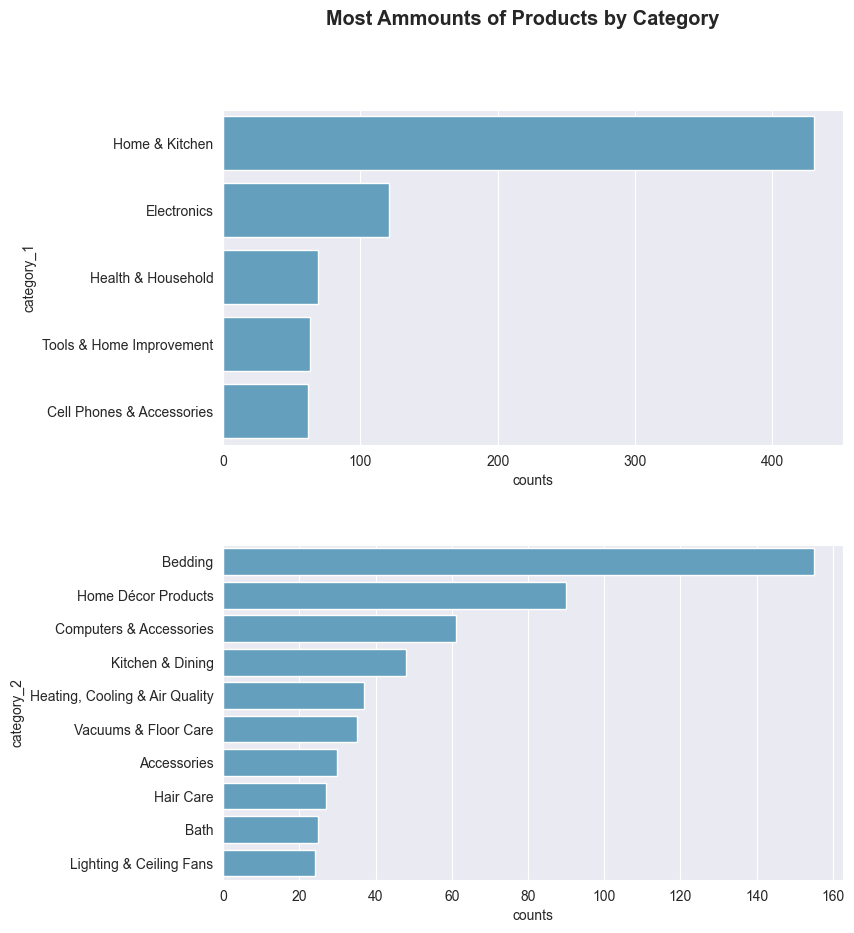

In [8]:
 # Getting the top 5 items in category 1 
most_main_items = df1['category_1'].value_counts().head(5).rename_axis('category_1').reset_index( name = 'counts' )

 # Getting the top 10 items in category 2
most_sub_items = df1['category_2'].value_counts().head(10).rename_axis('category_2').reset_index( name = 'counts' )

 # Plotting them in subplots 
fig,ax = plt.subplots( 2 , 1 , figsize = (8,10) )
fig.suptitle( 'Most Ammounts of Products by Category' , fontweight = 'heavy' , size = 'x-large' )

sns.barplot( ax = ax[0] , data = most_main_items , x = 'counts' , y = 'category_1')
sns.barplot( ax = ax[1] , data = most_sub_items , x = 'counts' , y = 'category_2') 

plt.subplots_adjust( hspace = 0.3 )
plt.show

From the output we can see that the most common products in category 1 are Home and Kitchen products with over 400 products while the most common products in category 2 are bedding products with over 150 products 

we will now try to find the most expensive product after discount and the cheapest product after discount 

<function matplotlib.pyplot.show(close=None, block=None)>

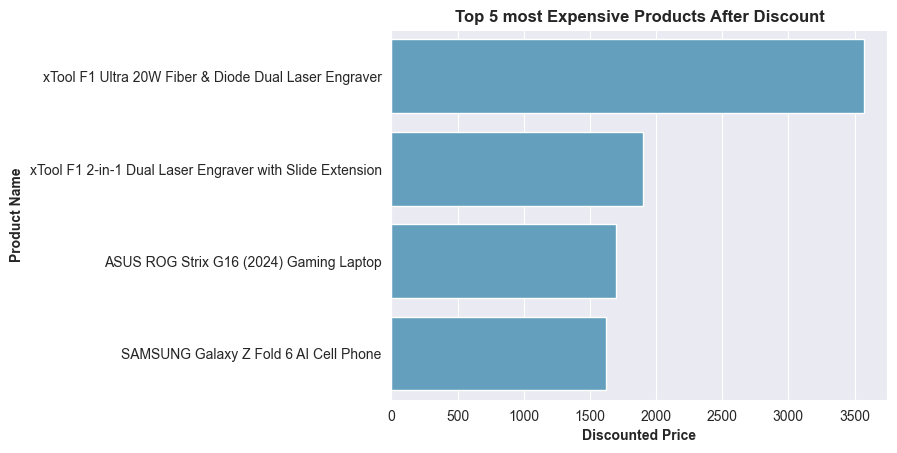

In [9]:
 # Getting the top 5 and bottom 5 expensive products
product_exp = sns.barplot( data = df1.sort_values ('Discounted_Price', ascending = False).head(5) , x = 'Discounted_Price', y = 'Product_Name')

 # Giving the Title
product_exp.set_title( 'Top 5 most Expensive Products After Discount' , fontweight = 'bold' )
product_exp.set_xlabel( 'Discounted Price' , fontweight = 'bold' )
product_exp.set_ylabel( 'Product Name' , fontweight = 'bold' )

plt.show


From the output we can see that the top top 5 most expensive products where the xTool F1 ultra 20W Fibre & Diode Dual Laser Engraver that has a price of over 3,500 dollars 

<function matplotlib.pyplot.show(close=None, block=None)>

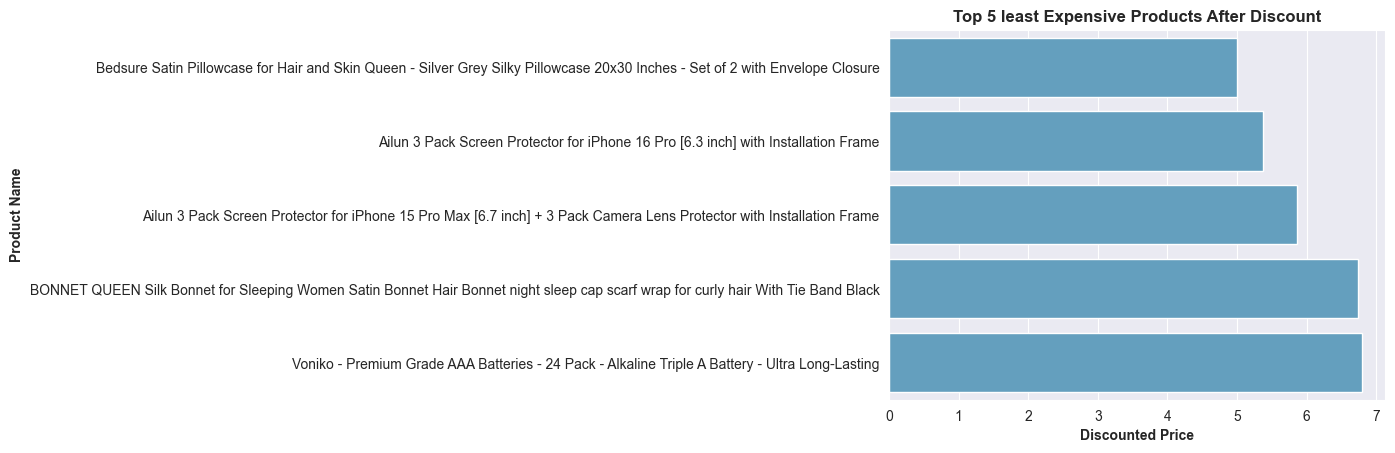

In [10]:
 # Getting the top 5 and bottom 5 expensive products
product_least_exp = sns.barplot( data = df1.sort_values ('Discounted_Price', ascending = True).head(5) , x = 'Discounted_Price', y = 'Product_Name')

 # Giving the Title
product_least_exp.set_title( 'Top 5 least Expensive Products After Discount' , fontweight = 'bold' )
product_least_exp.set_xlabel( 'Discounted Price' , fontweight = 'bold' )
product_least_exp.set_ylabel( 'Product Name' , fontweight = 'bold' )

plt.show

From the output we can see that the the cheapest product in the data is bedsure satin pillowcase for hair and skin.

We will then find the products that has the biggest price difference after discount 

<function matplotlib.pyplot.show(close=None, block=None)>

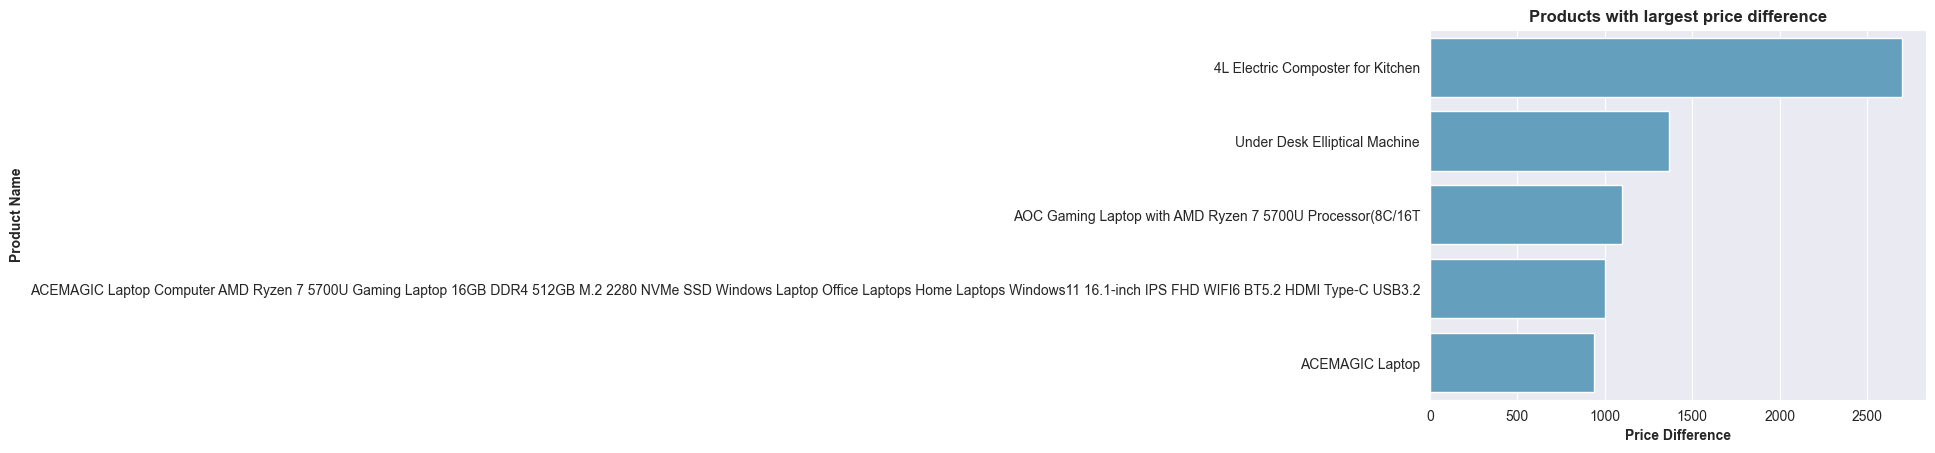

In [11]:
 # Getting the top 5 products with the largest price difference 
large_price_diff = sns.barplot( data = df1.sort_values ('Price_difference', ascending = False).head(5) , x = 'Price_difference', y = 'Product_Name')

 # Giving the Title
large_price_diff.set_title( 'Products with largest price difference' , fontweight = 'bold' )
large_price_diff.set_xlabel( 'Price Difference' , fontweight = 'bold' )
large_price_diff.set_ylabel( 'Product Name' , fontweight = 'bold' )

plt.show

From the output we can see that the product with the largest price difference is the 4l Electric Composter for Kitchen that has a price difference of over 25,00 dollars 

**CORRELATION BETWEEN FEATURES** 

Correlation is the relationship between two or more things and here we will use it to find relationship between different columns.
Correlation can only be calculated with columns that have numeric data therefore we will only use columns with numeric data 

,Discounted_Price,Actual_Price,Price_difference,Discount_Percentage,Rating,Rating_Count
Discounted_Price,1.000000,0.919699,0.458413,-0.111096,-0.061180,-0.173235
Actual_Price,0.919699,1.000000,0.770543,0.085520,-0.021834,-0.185654
Price_difference,0.458413,0.770543,1.000000,0.373935,0.049898,-0.139015
Discount_Percentage,-0.111096,0.085520,0.373935,1.000000,0.046625,-0.001408
Rating,-0.061180,-0.021834,0.049898,0.046625,1.000000,0.083237
Rating_Count,-0.173235,-0.185654,-0.139015,-0.001408,0.083237,1.000000


<Axes: >

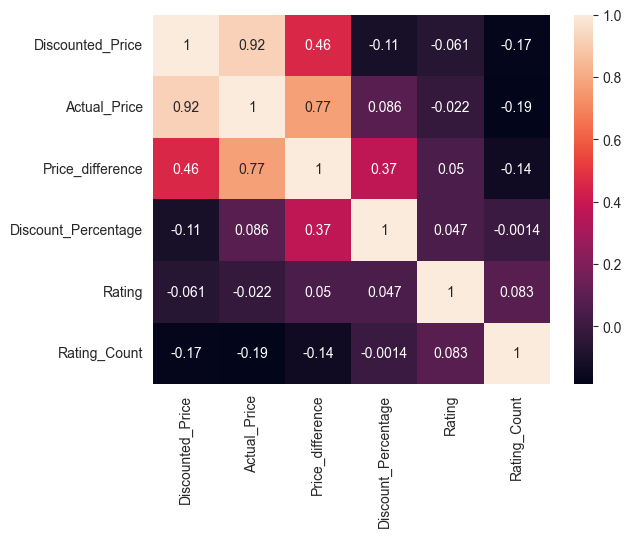

In [12]:
 # Creating Numeric dataframe
df_nums = df1.select_dtypes( include = [ 'Float64' , 'int64' ] )

 # Getting the correlation 
correlation = df_nums.corr()

display(correlation)
 # Generating aheatmap of the correlation
sns.heatmap( correlation ,annot = True )

From the output we can see that only the Actual_Price and Discounted_Price have a positive correlation of 0.99 therefore we will plot a scatter plot between Actual_Price and Discounted_Price

<function matplotlib.pyplot.show(close=None, block=None)>

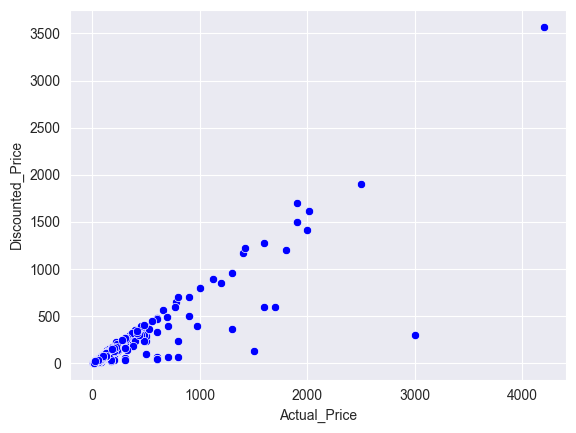

In [13]:
 # Plotting the Scatter Plot 
sns.scatterplot( data = df1 , y = 'Discounted_Price' , x = 'Actual_Price' , color = 'blue' )

plt.show

We will now visualize product rating using a histogram to see how the ratings are distributed.

<function matplotlib.pyplot.show(close=None, block=None)>

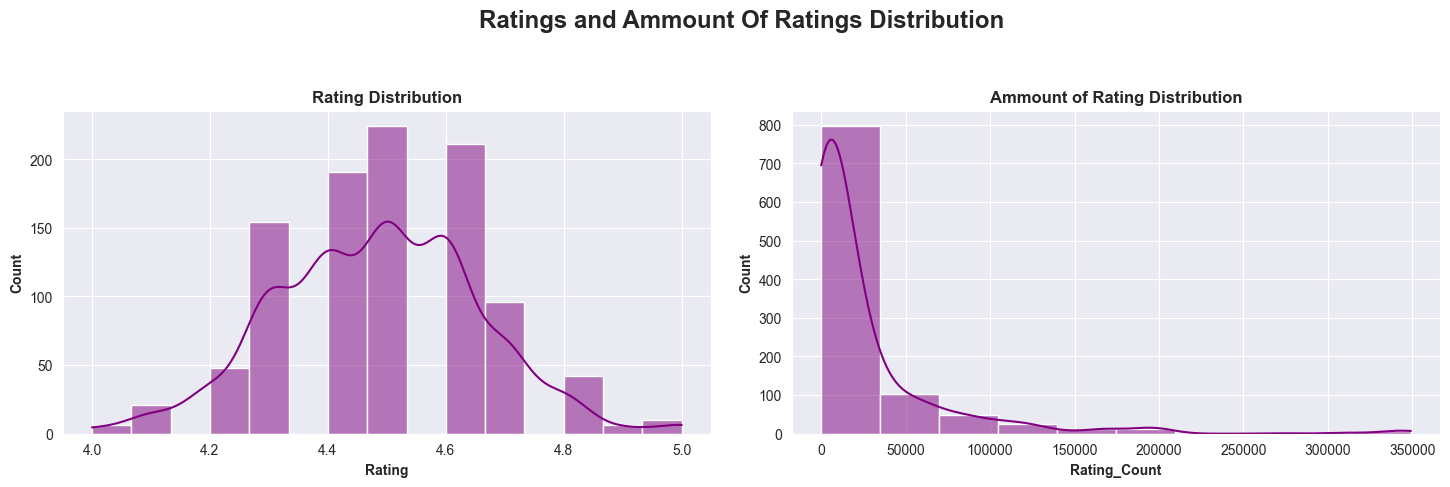

In [14]:
 # Plotting histogram with 1 row and 2 columns 
fig,ax = plt.subplots( 1 , 2 , figsize = (15 ,5) )
 # Heading of the whole plot 
fig.suptitle( 'Ratings and Ammount Of Ratings Distribution' , fontweight = 'heavy' , size = 'xx-large' )
fig.tight_layout( pad = 3.0 )

sns.histplot( ax = ax[0] , data = df1 , x = 'Rating' , bins = 15 , kde = True , color = 'purple' )
sns.histplot( ax = ax[1] , data = df1 , x = 'Rating_Count' , bins = 10 , kde = True , color = 'purple' )

ax[0].set_xlabel( 'Rating' , fontweight = 'bold' )
ax[1].set_xlabel( 'Rating_Count' , fontweight = 'bold' )

ax[0].set_ylabel( 'Count' , fontweight = 'bold' )
ax[1].set_ylabel( 'Count' , fontweight = 'bold' )

ax[0].set_title( 'Rating Distribution',fontweight = 'bold' )
ax[1].set_title( 'Ammount of Rating Distribution',fontweight = 'bold' )

plt.show

From the histograms we can see that the ratings are normally Distributed where most of the ratings are between 4.3 and 4.7 and no product has a rating below 4.0 

We can also see that ammount of rating distribution is positivley skewed(Rightly skewed) where most products have a total rating between 0 and 50,000 and there are some products with over 400,000 ratigs 

we will also use box plots to visualize the Spread ratings of Category_1.

<function matplotlib.pyplot.show(close=None, block=None)>

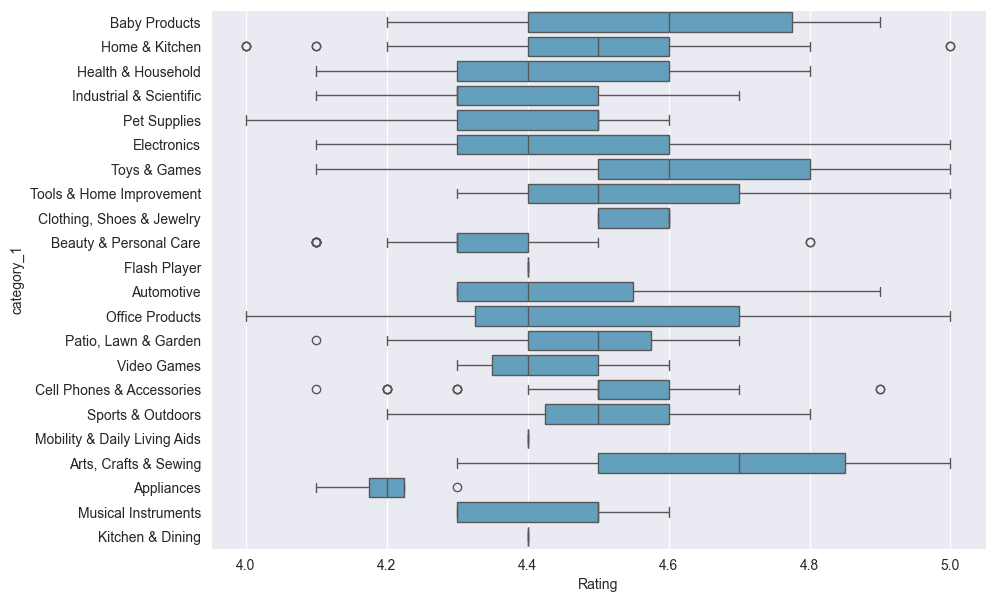

In [15]:
fig,ax = plt.subplots( figsize = ( 10 , 7 ))
sns.boxplot( ax = ax , data = df1 , x = 'Rating' , y = 'category_1' )

plt.show

From the output we can see that  Office Products has the widest spread rating from 4.0(lowest) and 4.8 (hisghest) and we can also also see the presence of outliers .
We can also see the product with the highest average rating are in the  Arts Craft & Sewing category while the products with lowest average rating are in the Appliances category  

We will now count the number of products grouping them with their category and rating_score

In [16]:
rate_main_category = df1.groupby(['category_1', 'Rating_Score'], observed = True )['Product_ID'].agg('count')
display(rate_main_category)

category_1                    Rating_Score 
Appliances                    Above Average      4
Arts, Crafts & Sewing         Above Average      2
                              Excellent          1
Automotive                    Above Average     15
Baby Products                 Above Average     34
Beauty & Personal Care        Above Average     44
Cell Phones & Accessories     Above Average     62
Clothing, Shoes & Jewelry     Above Average      5
Electronics                   Above Average    118
                              Excellent          3
Flash Player                  Above Average      1
Health & Household            Above Average     69
Home & Kitchen                Above Average    428
                              Excellent          2
Industrial & Scientific       Above Average     17
Kitchen & Dining              Above Average      1
Mobility & Daily Living Aids  Above Average      1
Musical Instruments           Above Average      5
Office Products               Above Av

From the Output we can see that Home and Kitchen have the most products that are Above Average 

We will now visualize the spread of ratings in each category_2

<Axes: xlabel='Rating', ylabel='category_2'>

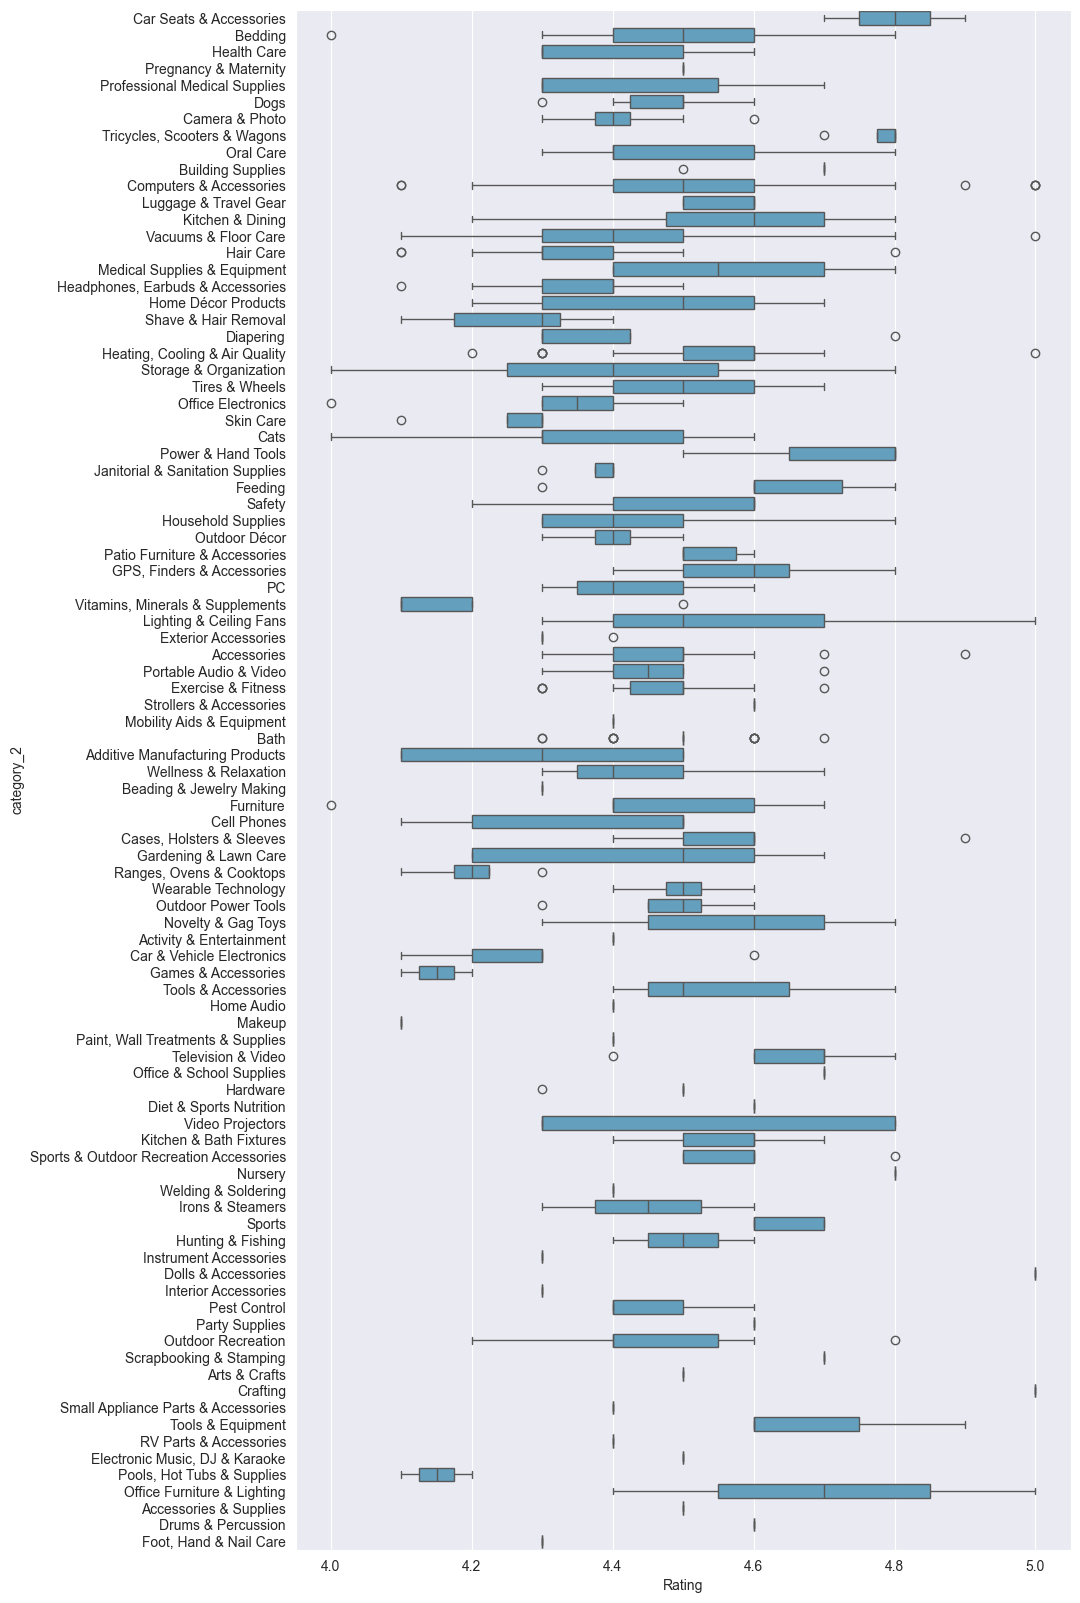

In [17]:
fig,ax = plt.subplots( figsize = ( 10 , 20))
sns.boxplot( ax = ax , data = df1 , x = 'Rating' , y = 'category_2' )

From the output we can see that the lowest Rated product comes from the sub_category Storage & Organization and Cats . We can also see that the the sub_category with the highest average rating is Arts & Crafs and Dolls and Accesories  and the sub_category with the lowest average rating are pools,hottubs & supplies and Games & Accesories.
From the box plots we can see that there are several outliers

We will now find the ratings of all products in percentage 

,rating,counts
0,Above Average,0.99
1,Excellent,0.01


<function matplotlib.pyplot.show(close=None, block=None)>

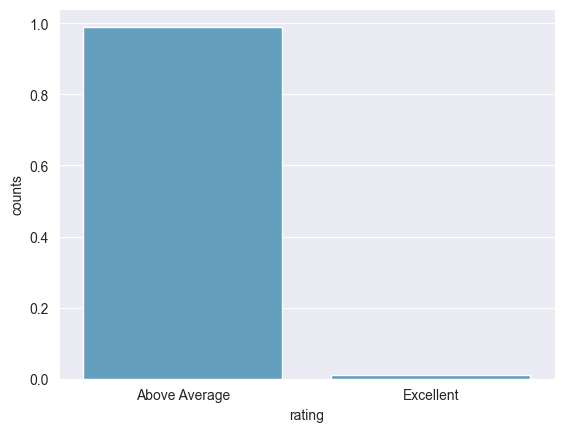

In [18]:
rating_ordered = [ 'Above Average','Excellent' ]
rating_count = df1['Rating_Score'].value_counts( normalize = True ).rename_axis('rating').reset_index( name = 'counts' )

 # Rounding off to 3 decimal places  
rating_count['counts'] = rating_count['counts'].round(3)
display(rating_count)

 # Plotting 
rating_count_plot = sns.barplot( data = rating_count , x = 'rating' , y = 'counts' , order = rating_ordered )

plt.show


From the output we can see that 99% of the products have a rating score of Above Average while only 1% of the products have a rating of Excellent

We will now create a pivot table which has mean , median ,25th percentile and 75th percentile of ratings and rating counts  

In [ ]:
 # Defining the functions 
def p25(g):
    return np.percentile(g,25)

def p75(g):
    return np.percentile(g,75)

 # Creating a Pivot Table
rating_pivot = df1.pivot_table( values = ['Rating' , 'Rating_Count'] , index = ['category_1' , 'category_2'] , aggfunc = ([ p25 , 'mean' , 'median' , p75 ]))

 # Renaming Columns
rating_pivot = rating_pivot.rename( columns = { 'p25' : '25th Percentile' , 'p75' : '75th Percentile' , 'mean' : 'Mean' , 'median' : 'Median' } , index = { 'category_1' : 'Main_Category' , 'category_2' : 'Sub_Category'})

display( rating_pivot )

From our dataframe df2 which contains Reviewers and we can check who made more reviews in more than one product 

<function matplotlib.pyplot.show(close=None, block=None)>

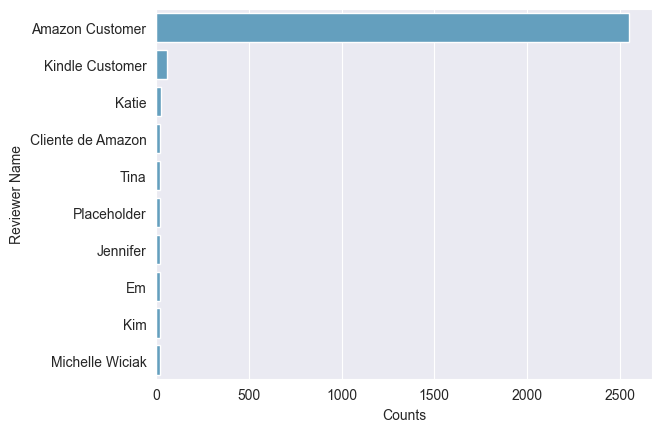

In [20]:
 # Getting the counts of the reviewers 
top_reviewer = df2['Reviewers'].value_counts().head(10).rename_axis('Reviewer Name').reset_index( name = 'Counts' )

 # plotting a barplot 
top_reviewer_plot = sns.barplot( data = top_reviewer , x = 'Counts' , y = 'Reviewer Name')

plt.show

From the barplot we can see that more than 2500 people made a review and gave a rating anonymously under the alias Amazon customer , Kindle Customer ,Placeholder and Client de Amazon while katie, Tina, Jennifer, Em, Kim and Michelle Wiciak made reviews for more than one product. 

**PRODUCT PRICING**

Here we will visualize the distribution of Actual Price and Discounted Price using a Histogram 

<function matplotlib.pyplot.show(close=None, block=None)>

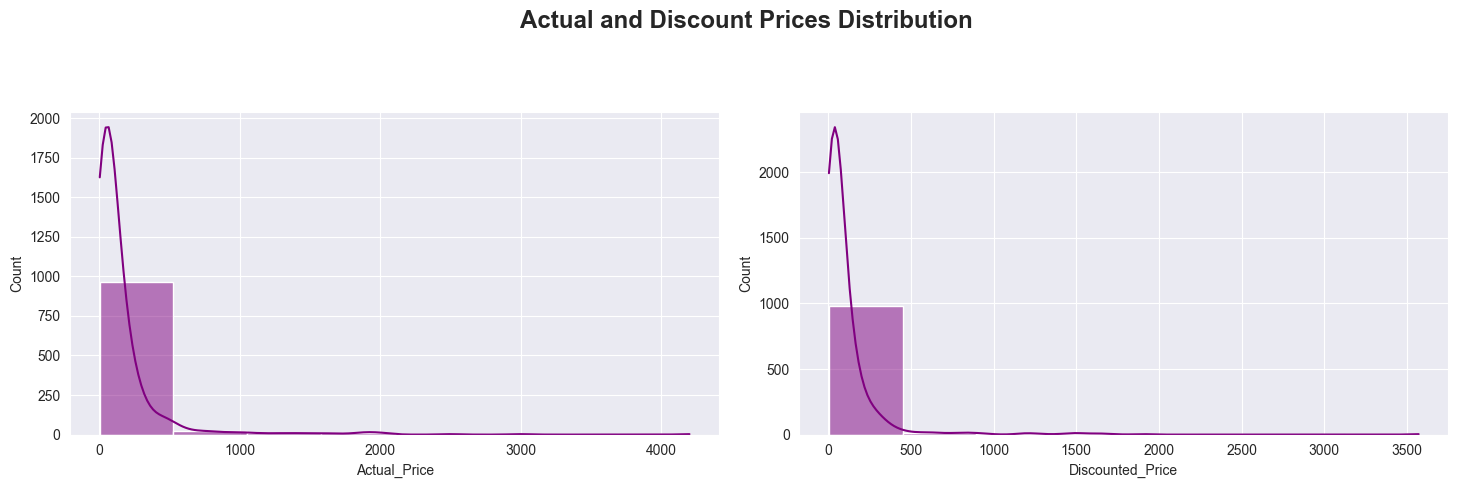

In [21]:
fig,ax = plt.subplots( 1 , 2 , figsize = (15,5) )

fig.suptitle( 'Actual and Discount Prices Distribution ' , fontweight = 'heavy' , size = 'xx-large' )
fig.tight_layout( pad = 3.0 )

sns.histplot( ax = ax[0] ,data = df1 ,x = 'Actual_Price' , bins = 8 , kde = True , color = 'purple' )
sns.histplot( ax = ax[1] ,data = df1 ,x = 'Discounted_Price' , bins = 8 , kde = True , color = 'purple' )

plt.show

We can both see that both the Actual price and Discounted Price have the same distribution that are both Rightly skewed.

We will now plot the distribution of the Discount Percentage 

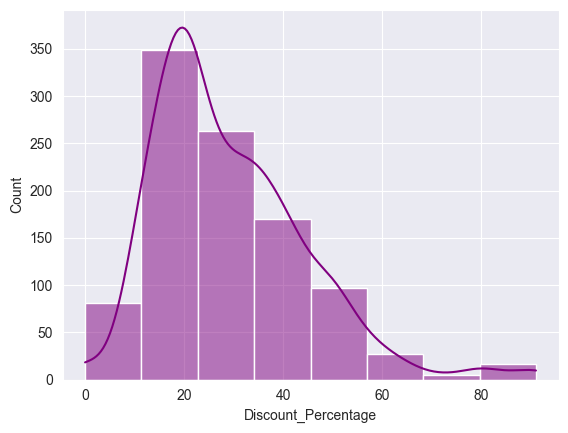

In [22]:
discount_percentage_hist = sns.histplot( data = df1 , x = 'Discount_Percentage' , bins = 8 , kde = True , color = 'purple' )
plt.show()

From the Graph we can see that the distibution is Rightly skewed  where most products have a discount between 20-40 percent 

In [23]:
 # Getting the mean , mode , median , max , min , and percentiles 
display( df1['Discount_Percentage'].describe() )

count    1009.000000
mean       29.264618
std        15.447439
min         0.000000
25%        19.000000
50%        26.000000
75%        38.000000
max        91.000000
Name: Discount_Percentage, dtype: float64

The maximum percentage discount is 91% and the minimum is 0% 

To see the products with  a 91% Discount

In [25]:
display( df1[df1['Discount_Percentage'] == 91][['Product_ID','Product_Name']] )

,Product_ID,Product_Name
343,B0D5WLL1VL,Paint Sprayer-1000W-High-Power-Electric-Spray-...
461,B0D5WKHFD7,Paint-Sprayer-1000W-High-Power-Electric-Spray-...
493,B0D8W68VGZ,Under Desk Elliptical Machine
904,B0D6XN67XR,Tire Inflator Portable Air Compressor-Air Pump...


From the output we can see that 4 products have a discount percentage of 91%

We will then visualize the discount percentage by main categgory(category_1) using box plots 

<function matplotlib.pyplot.show(close=None, block=None)>

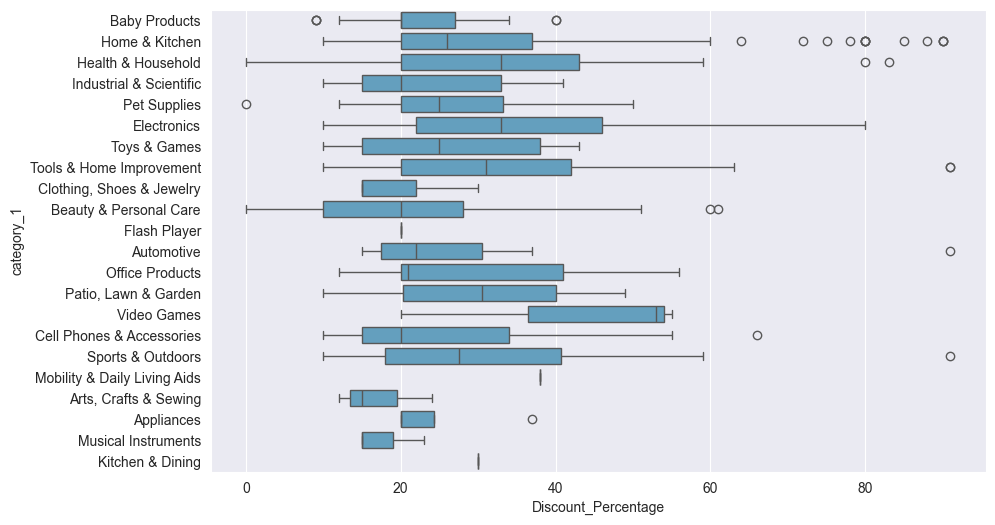

In [26]:
fig,ax = plt.subplots( figsize = ( 10 , 6 ))
sns.boxplot( data = df1 , x = 'Discount_Percentage' , y = 'category_1' )
plt.show

From the box plots we can see that the category with the largest spread of discount are Electronics while Kitchen & Dining , Mobility & Daily Living Aids and Flash Player have the lowest spread od discount

Creating box plots for sub_category(category_2)

<function matplotlib.pyplot.show(close=None, block=None)>

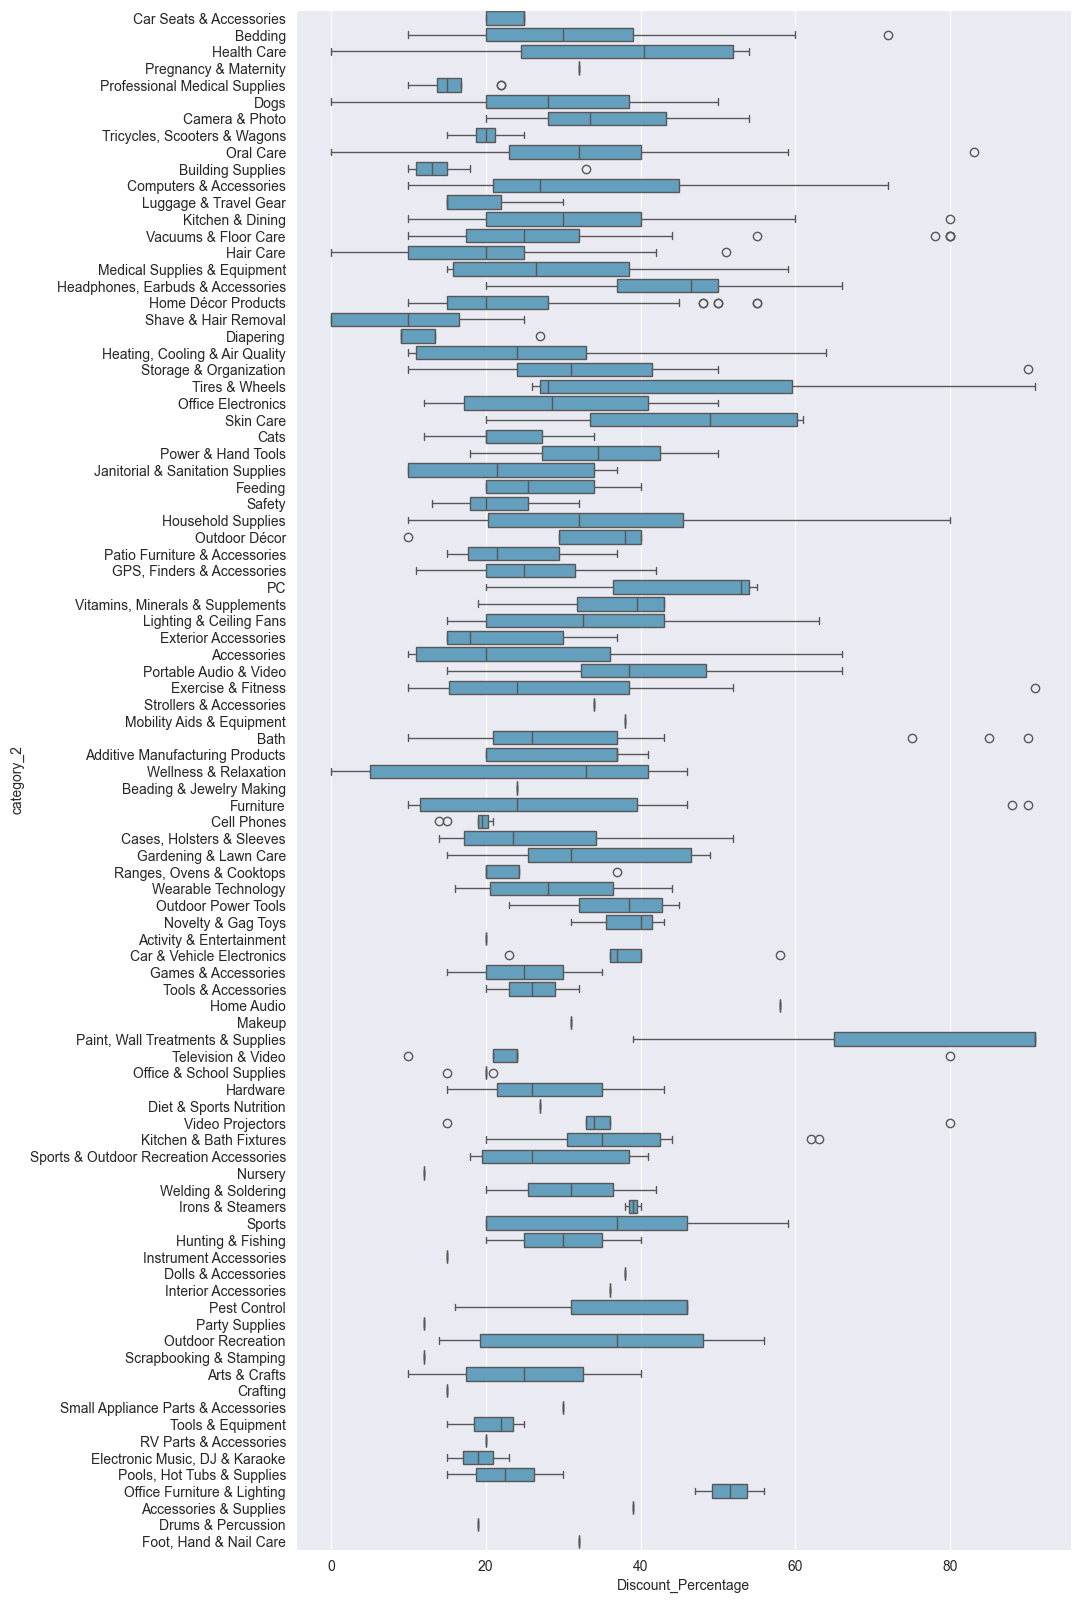

In [27]:
fig,ax = plt.subplots( figsize = ( 10 ,20 ))
sns.boxplot( data = df1 , x = 'Discount_Percentage' , y = 'category_2' )
plt.show

We will now plot price ranges of actual price and Discounted price by sub category using a scatter plot 

<function matplotlib.pyplot.show(close=None, block=None)>

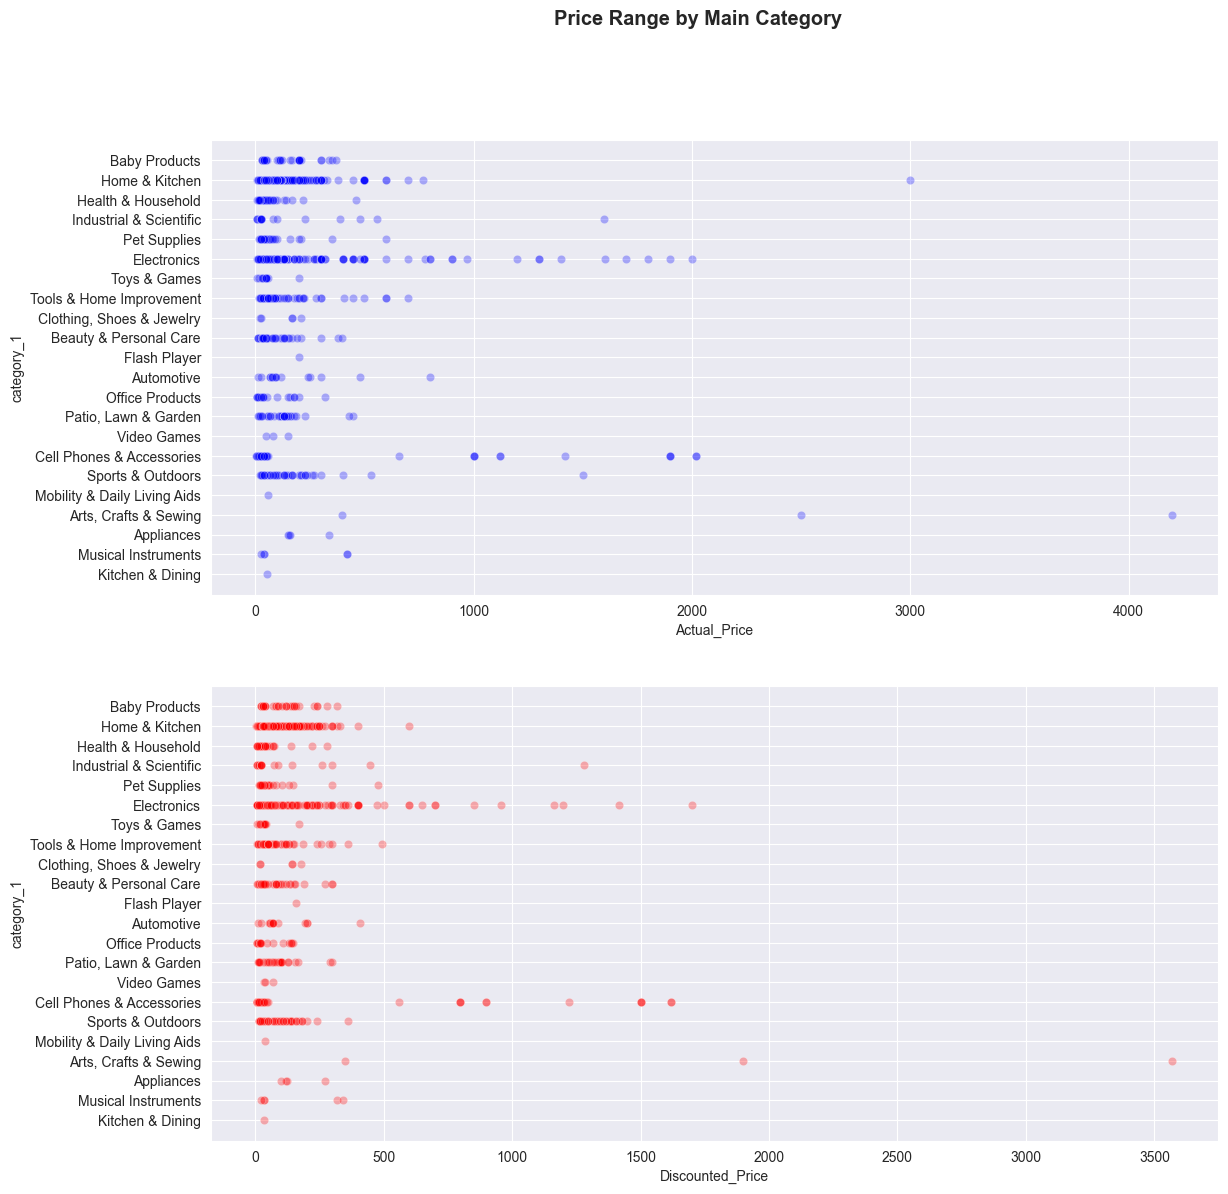

In [28]:
fig,ax = plt.subplots( 2 , 1 , figsize = ( 13 , 13 ))
fig.suptitle( 'Price Range by Main Category' , fontweight = 'heavy' , size = 'x-large' )

sns.scatterplot( ax = ax[0], data = df1 , y = 'category_1' , x = 'Actual_Price' , alpha = 0.3 , color = 'blue' )
sns.scatterplot( ax = ax[1], data = df1 , y = 'category_1' , x = 'Discounted_Price' , alpha = 0.3 , color = 'red' )

plt.show

We can see that there is a significant decrease in price after discount especially on electronics category where most product's actual price falls below 2,000 dollars  and for discounted price  most products fall under 1,000 dollars

visualizing for sub_category( category_2 )

<function matplotlib.pyplot.show(close=None, block=None)>

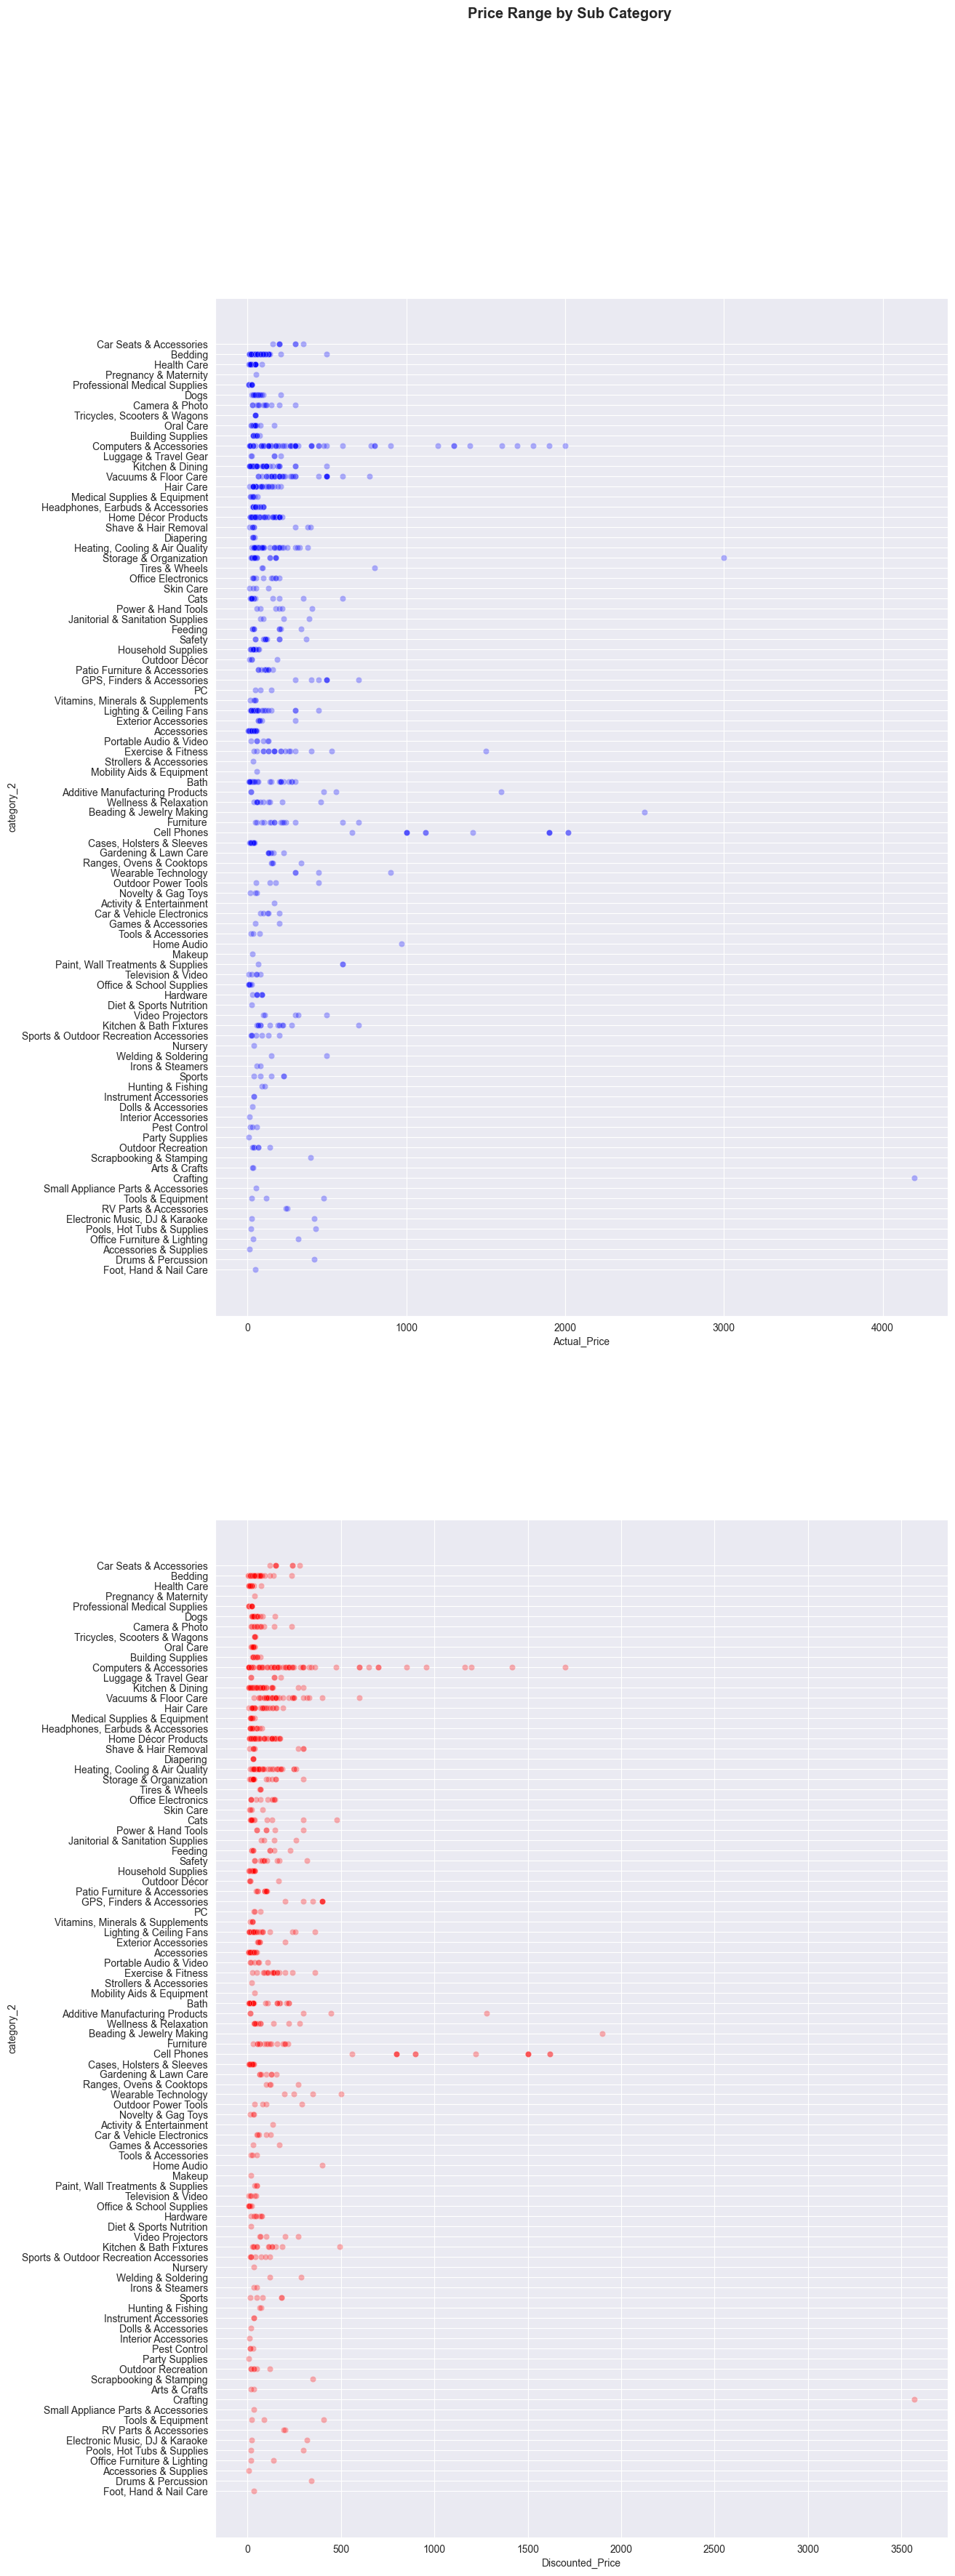

In [29]:
fig,ax = plt.subplots( 2 , 1 , figsize = ( 13 , 40 ))
fig.suptitle( 'Price Range by Sub Category' , fontweight = 'heavy' , size = 'x-large' )

sns.scatterplot( ax = ax[0], data = df1 , y = 'category_2' , x = 'Actual_Price' , alpha = 0.3 , color = 'blue' )
sns.scatterplot( ax = ax[1], data = df1 , y = 'category_2' , x = 'Discounted_Price' , alpha = 0.3 , color = 'red' )

plt.show

We can create a pivot table grouping by category_1 and cattegory_2 showing mean ,median ,25th and 75th percentile of actual and discounted price

In [30]:
 # Creating a Pivot Table
actual_price_pivot = df1.pivot_table( values = ['Actual_Price' , 'Discounted_Price'] , index = ['category_1' , 'category_2'] , aggfunc = ([ p25 , 'mean' , 'median' , p75 ]))

 # Renaming Columns
actual_price_pivot = actual_price_pivot.rename( columns = { 'p25' : '25th Percentile' , 'p75' : '75th Percentile' , 'mean' : 'Mean' , 'median' : 'Median' } , index = { 'category_1' : 'Main_Category' , 'category_2' : 'Sub_Category'})

display( actual_price_pivot )

25th Percentile  \
                                                      Actual_Price   
category_1            category_2                                     
Appliances            Ranges, Ovens & Cooktops              155.24   
Arts, Crafts & Sewing Beading & Jewelry Making             2499.99   
                      Crafting                             4199.99   
                      Scrapbooking & Stamping               399.00   
Automotive            Exterior Accessories                   68.90   
...                                                            ...   
Toys & Games          Games & Accessories                    87.12   
                      Novelty & Gag Toys                     34.49   
                      Party Supplies                          7.95   
                      Tricycles, Scooters & Wagons           49.99   
Video Games           PC                                     64.99   

                                                                     \
                                                   Discounted_Price   
category_1            category_2                                      
Appliances            Ranges, Ovens & Cooktops             114.9900   
Arts, Crafts & Sewing Beading & Jewelry Making            1899.0000   
                      Crafting                            3569.9900   
                      Scrapbooking & Stamping              349.0000   
Automotive            Exterior Accessories                  57.1125   
...                                                             ...   
Toys & Games          Games & Accessories                   66.1750   
                      Novelty & Gag Toys                    21.4900   
                      Party Supplies                         6.9900   
                      Tricycles, Scooters & Wagons          39.4075   
Video Games           PC                                    37.9900   

                                                           Mean  \
                                                   Actual_Price   
category_1            category_2                                  
Appliances            Ranges, Ovens & Cooktops       201.740000   
Arts, Crafts & Sewing Beading & Jewelry Making      2499.990000   
                      Crafting                      4199.990000   
                      Scrapbooking & Stamping        399.000000   
Automotive            Exterior Accessories           113.258333   
...                                                         ...   
Toys & Games          Games & Accessories            125.250000   
                      Novelty & Gag Toys              42.986667   
                      Party Supplies                   7.950000   
                      Tricycles, Scooters & Wagons    50.240000   
Video Games           PC                              93.323333   

                                                                     \
                                                   Discounted_Price   
category_1            category_2                                      
Appliances            Ranges, Ovens & Cooktops           154.390000   
Arts, Crafts & Sewing Beading & Jewelry Making          1899.000000   
                      Crafting                          3569.990000   
                      Scrapbooking & Stamping            349.000000   
Automotive            Exterior Accessories                82.888333   
...                                                             ...   
Toys & Games          Games & Accessories                100.850000   
                      Novelty & Gag Toys                  25.656667   
                      Party Supplies                       6.990000   
                      Tricycles, Scooters & Wagons        40.087500   
Video Games           PC                                  48.656667   

                                                         Median  \
                                                   Actual_Price   
categor